In [331]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [332]:
train = pd.read_csv('aug_train.csv')
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [333]:
test = pd.read_csv('aug_test.csv')
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [334]:
print(train.isnull().sum())
train.shape

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64


(19158, 14)

In [335]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
enrollee_id               19158 non-null int64
city                      19158 non-null object
city_development_index    19158 non-null float64
gender                    14650 non-null object
relevent_experience       19158 non-null object
enrolled_university       18772 non-null object
education_level           18698 non-null object
major_discipline          16345 non-null object
experience                19093 non-null object
company_size              13220 non-null object
company_type              13018 non-null object
last_new_job              18735 non-null object
training_hours            19158 non-null int64
target                    19158 non-null float64
dtypes: float64(2), int64(2), object(10)
memory usage: 2.0+ MB


In [336]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [337]:
print(test.isnull().sum())
test.shape

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64


(2129, 13)

In [338]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
enrollee_id               2129 non-null int64
city                      2129 non-null object
city_development_index    2129 non-null float64
gender                    1621 non-null object
relevent_experience       2129 non-null object
enrolled_university       2098 non-null object
education_level           2077 non-null object
major_discipline          1817 non-null object
experience                2124 non-null object
company_size              1507 non-null object
company_type              1495 non-null object
last_new_job              2089 non-null object
training_hours            2129 non-null int64
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


In [339]:
train['experience'] = train['experience'].str.replace('<','')
train['last_new_job'] = train['last_new_job'].str.replace('<','')
train['company_size'] = train['company_size'].str.replace('<','')


In [340]:
train['experience'] = train['experience'].str.replace('>','')
train['last_new_job'] = train['last_new_job'].str.replace('>','')

In [341]:
test['experience'] = test['experience'].str.replace('<','')
test['last_new_job'] = test['last_new_job'].str.replace('<','')
test['company_size'] = test['company_size'].str.replace('<','')


In [342]:
test['experience'] = test['experience'].str.replace('>','')
test['last_new_job'] = test['last_new_job'].str.replace('>','')

In [343]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20,50-99,Funded Startup,4,8,0.0


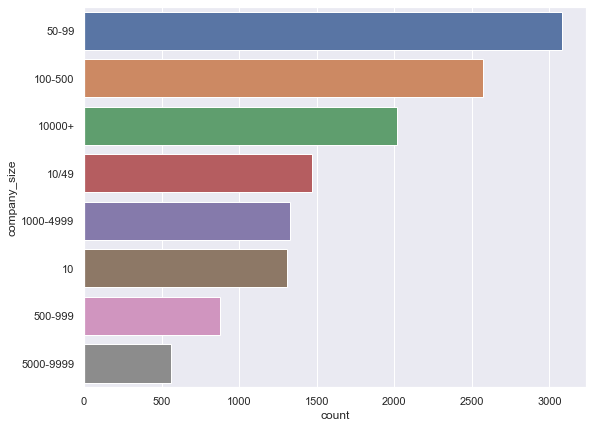

In [344]:
plt.figure(figsize=(9,7))
sns.countplot(y='company_size',data=train,order =train.company_size.value_counts().index )
plt.show()

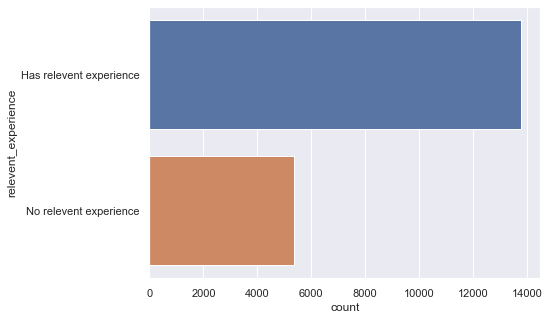

In [345]:
plt.figure(figsize=(7,5))
sns.countplot(y='relevent_experience',data=train,order =train.relevent_experience.value_counts().index )
plt.show()

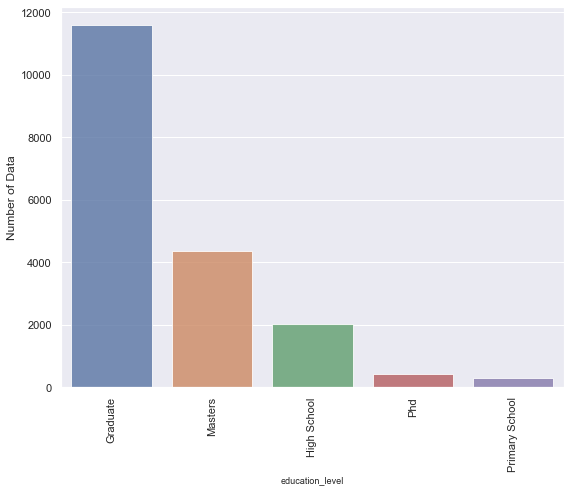

In [346]:
EL = train['education_level'].value_counts()  
plt.figure(figsize=(9,7))
sns.barplot(EL.index, EL.values, alpha=0.8)
plt.ylabel('Number of Data', fontsize=12)
plt.xlabel('education_level', fontsize=9)
plt.xticks(rotation=90)
plt.show()

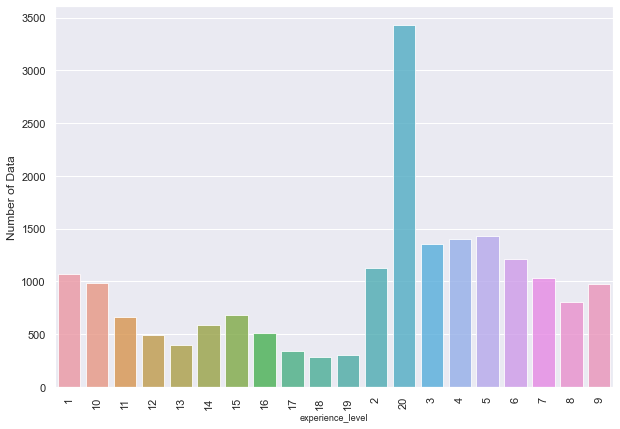

In [347]:

Experience_level = train['experience'].value_counts()  
plt.figure(figsize=(10,7))
sns.barplot(Experience_level.index, Experience_level.values, alpha=0.8)
plt.ylabel('Number of Data', fontsize=12)
plt.xlabel('experience_level', fontsize=9)
plt.xticks(rotation=90)
plt.show()

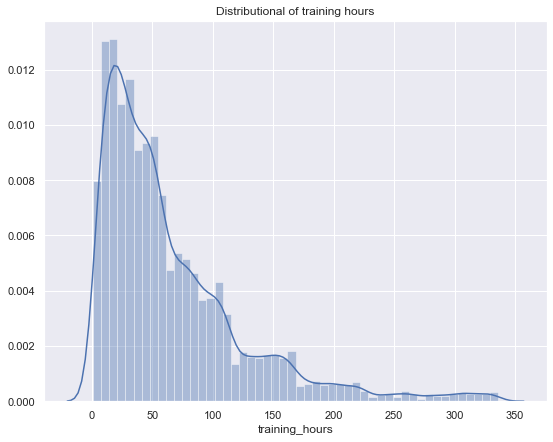

In [348]:
plt.figure(figsize=(9,7))
sns.distplot(train["training_hours"])
plt.title("Distributional of training hours")
plt.show()

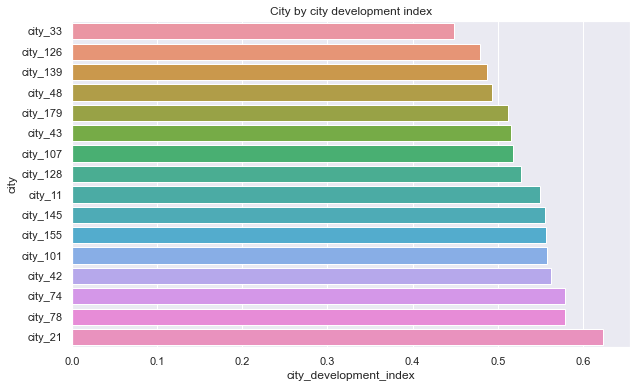

In [349]:
city_dev_index = train.sort_values(by='city_development_index', ascending=True)[:2000]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=city_dev_index.city, x=city_dev_index.city_development_index)
plt.xticks()
plt.xlabel('city_development_index')
plt.ylabel('city')
plt.title('City by city development index')
plt.show()

In [350]:
train_cols= ['gender','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job']

In [351]:
for i in train_cols:
    print(train[i].value_counts())
    print("**************")
    print("**************")

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64
**************
**************
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64
**************
**************
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64
**************
**************
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64
**************
**************
20    3434
5     1430
4     1403
3     1354
6     1216
2     1127
1     1071
7     1028
10     985
9      980
8      802
15     686
11     664
14     586
16     508
12     494
13     399
17     342
19     304
18     280
Name: experience, dtype: int64
**************
**************
50-99        3083
100-500      2571
10000+       2019
10/49    

In [352]:
train['gender'] = train['gender'].fillna('Other')
train['enrolled_university'] = train['enrolled_university'].fillna((train['enrolled_university'].mode()[0]))
train['education_level'] = train['education_level'].fillna((train['education_level'].mode()[0]))
train['major_discipline'] = train['major_discipline'].fillna((train['major_discipline'].mode()[0]))
train['company_size'] = train['company_size'].fillna((train['company_size'].mode()[0]))
train['company_type'] = train['company_type'].fillna('others')
train['education_level'] = train['education_level'].fillna((train['education_level'].mode()[0]))
train['experience'] = train['experience'].fillna((train['experience'].mode()[0]))
train['last_new_job'] = train['last_new_job'].fillna((train['last_new_job'].mode()[0]))



In [353]:
test_cols= ['gender','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job']

In [354]:
for i in test_cols:
    print(test[i].value_counts())
    print("**************")
    print("**************")

Male      1460
Female     137
Other       24
Name: gender, dtype: int64
**************
**************
no_enrollment       1519
Full time course     435
Part time course     144
Name: enrolled_university, dtype: int64
**************
**************
Graduate          1269
Masters            496
High School        222
Phd                 54
Primary School      36
Name: education_level, dtype: int64
**************
**************
STEM               1621
Humanities           80
Other                40
Business Degree      37
No Major             22
Arts                 17
Name: major_discipline, dtype: int64
**************
**************
20    402
5     163
3     154
4     145
1     130
6     130
2     128
7     116
9     113
10     96
11     86
8      82
16     68
15     59
14     55
13     54
12     52
17     36
19     29
18     26
Name: experience, dtype: int64
**************
**************
50-99        338
100-500      318
10000+       217
10/49        172
10           163
1000-4999    14

In [355]:
test['gender'] = test['gender'].fillna('others')
test['enrolled_university'] = test['enrolled_university'].fillna((test['enrolled_university'].mode()[0]))
test['education_level'] = test['education_level'].fillna((test['education_level'].mode()[0]))
test['major_discipline'] = test['major_discipline'].fillna((test['major_discipline'].mode()[0]))
test['company_size'] = test['company_size'].fillna((test['company_size'].mode()[0]))
test['company_type'] = test['company_type'].fillna('others')

test['education_level'] = test['education_level'].fillna((test['education_level'].mode()[0]))
test['experience'] = test['experience'].fillna((test['experience'].mode()[0]))
test['last_new_job'] = test['last_new_job'].fillna((test['last_new_job'].mode()[0]))

In [356]:
train.isnull().sum()


enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [357]:
test.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

In [358]:
train.gender.value_counts()

Male      13221
Other      4699
Female     1238
Name: gender, dtype: int64

In [359]:
train.target.value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

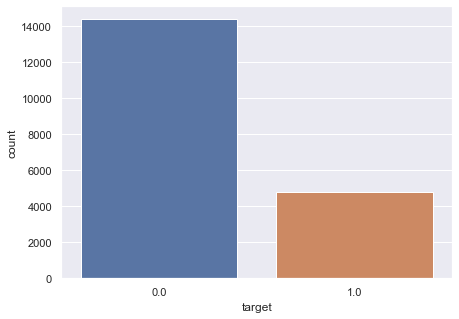

In [360]:
taget_values = train.target.value_counts()
plt.figure(figsize=[7,5])
sns.set(style='darkgrid')
sns.countplot(x='target', data=train,order = train['target'].value_counts().index)
plt.show()

In [361]:
train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [362]:
categorical = train.select_dtypes(include='object')


In [363]:
for i in categorical:
    train[i] = train[i].astype("category").cat.codes

In [364]:
categorical_test = test.select_dtypes(include='object')


In [365]:
for i in categorical:
    test[i] = test[i].astype("category").cat.codes

In [366]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
enrollee_id               2129 non-null int64
city                      2129 non-null int8
city_development_index    2129 non-null float64
gender                    2129 non-null int8
relevent_experience       2129 non-null int8
enrolled_university       2129 non-null int8
education_level           2129 non-null int8
major_discipline          2129 non-null int8
experience                2129 non-null int8
company_size              2129 non-null int8
company_type              2129 non-null int8
last_new_job              2129 non-null int8
training_hours            2129 non-null int64
dtypes: float64(1), int64(2), int8(10)
memory usage: 70.8 KB


<AxesSubplot:>

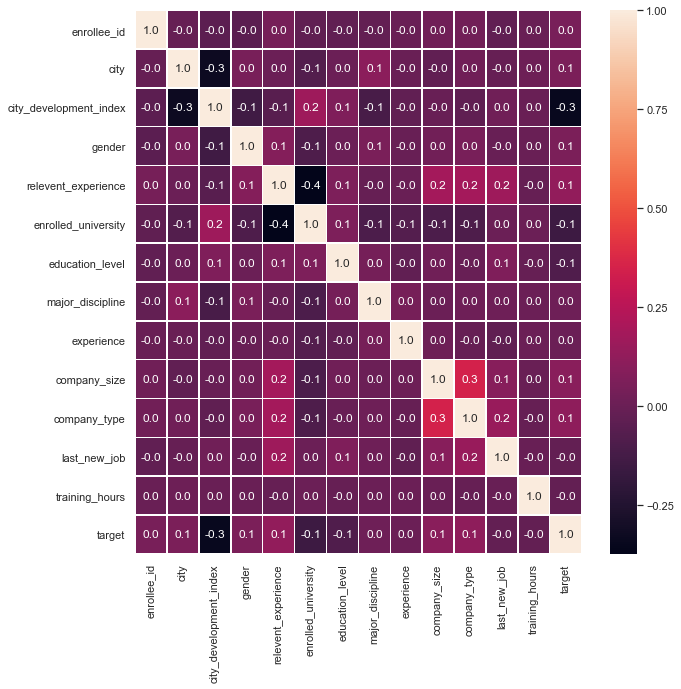

In [367]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(train.corr(),annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [368]:
X = train.drop('target',1)
y = train['target']

In [369]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20, random_state=3)

In [374]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)
print(logistic_model.score(X_train,y_train))

linear_pred = logistic_model.predict(X_test)

0.751794336421767


C:\Users\Abhineet\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [379]:
logistic_rd = classification_report(y_test, linear_pred)
print("Logistic regression Classification report\n",linear_rd)


Logistic regression Classification report
               precision    recall  f1-score   support

         0.0       0.74      1.00      0.85      2852
         1.0       0.20      0.00      0.00       980

    accuracy                           0.74      3832
   macro avg       0.47      0.50      0.43      3832
weighted avg       0.61      0.74      0.64      3832



In [378]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=20)

rf_clf.fit(X_train, y_train)
predicted_rf = rf_clf.predict(X_test)

print("Random forest classification chart:\n",classification_report(y_test, predicted_rf))

Random forest classification chart:
               precision    recall  f1-score   support

         0.0       0.82      0.89      0.85      2852
         1.0       0.58      0.42      0.49       980

    accuracy                           0.77      3832
   macro avg       0.70      0.66      0.67      3832
weighted avg       0.76      0.77      0.76      3832

